Grupo de trabajo (CGR-Costa Rica):

Carmen Garro Carranza   
Hazel Mena Monge    
Juan Alejandro Herrera López


# 1

1.	Utilizando la metodología de Cox-Tukey lleve a cabo la identificación de proyectos de arreglos de vías terciarias con valores extremos en el total de proyectos.
Elabore un histograma de la variable transformada.

## Box-Cox Diagrama de caja y bigotes

El boxplot se calcula con base a los cuartiles:


1.   Se ordenan los datos de menor a mayor
2.   **Cuartil 1**, es el valor a partir del cual el 25% de los datos tienen un valor menor a este. **Cuartil 2**, igual que el 1 pero con el 50% de los datos. Es la mediana. Es robusta, o sea no es afectada por valores extremos. **Cuartil 
3** valor para el 75% de los datos. 
3.   Se calcula el **Rango Intercuartil**, RI = q3 - q1
4.   Se calculan los bigotes inferior y superior. LW = q1 - k * IR. Tukey propuso k = 1.5. Si el valor resultante es menor al mínimo de los datos, se deja el mínimo como bigote inferior. $$LW = max(min(x), q1-k * IR)$$ Y el bigote superior sería: $$UW = min(max(x), q3 + k*IR)$$

*Bajo las reglas de Tukey, todo dato que está alejado más de 1.5 veces el Rango Intercuartil más cercano se le atribuye ser anómalo.*

* Filzmoser, Gussebauer y Templ (2016) proponen realizar una transformación previa para datos con distribuciones asimétricas.

$$y(\lambda) = \begin{cases}  \frac{x^{\lambda}-1}{\lambda}, &  \mbox{si } \lambda \ne 0 \\ log{(\lambda)}, & \mbox{si } \lambda = 0 \end{cases}   $$

El $\lambda$ es un valor entre -5 y 5 que resulta en la mejor aproximación a la curva normal.


## Ejercicio

In [ ]:
import numpy as np
from scipy import stats
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

url = 'https://raw.githubusercontent.com/josezea/Anomalias/main/sesion4/regalias_viasterciarias.csv'
regalias = pd.read_csv(url)
regalias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           207 non-null    int64  
 1   id_proyecto          207 non-null    object 
 2   nombre_del_proyecto  207 non-null    object 
 3   nombre_ocad          207 non-null    object 
 4   region               207 non-null    object 
 5   departamento         207 non-null    object 
 6   sector_suifp         207 non-null    object 
 7   programa             207 non-null    object 
 8   subprograma          207 non-null    object 
 9   avance_fisico        207 non-null    float64
 10  avance_financiero    207 non-null    float64
 11  estado_detalle       207 non-null    object 
 12  estado_general       207 non-null    object 
 13  anno                 207 non-null    int64  
 14  valor_sgr            207 non-null    int64  
 15  valor_nación         207 non-null    int

In [ ]:
#regalias.total_proyecto
#valores transformados y
#lambda que se uso de potencia f_lambda
y, f_lambda = stats.boxcox(regalias.total_proyecto)
f_lambda

-0.051858459461380214

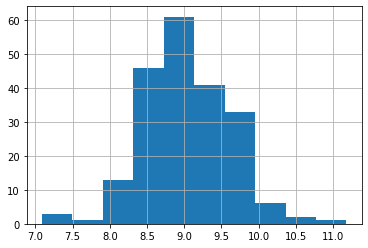

In [ ]:
#histograma
pd.Series(y).hist()

Text(0.5, 1.0, 'Variable transformada')

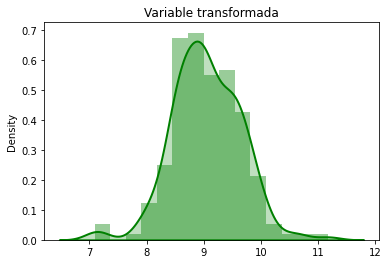

In [ ]:
sns.distplot(y, hist = True, kde = True,
             kde_kws= {'shade':True, 'linewidth':2},
             label = 'Variable transformada',
             color = 'green').set_title('Variable transformada')

a. El valor de lambda es: **-0.0518**

b. Identifique, una vez que estén los valores transformados, los outliers detectados con la regla de Tukey (usando un valor de k=1.5). 

In [ ]:
##calculos para el diagrama de bigotes

#import numpy as np
def fivenum(x, range = 1.5, nan_remove = True):
  """DEvuelve los cinco números de Tukey (mínimo, bigote inferior, mediana,
  bigote superior, maximo) para una lista, arreglo univariado de numpy o serie de pandas"""
  if(isinstance(x, list)):
    x = np.array(x)
  try:
    np.sum(x)
  except TypeError :
    print('Error: you must provide a list or array of only numbers')
  if(nan_remove == True):
    y = x[~np.isnan(x)]
    q1 = np.percentile(y, 25)
    q3 = np.percentile(y,75)
    md = np.median(y)
    iqr = q3-q1
    lower_whisker = q1 - range * iqr
    upper_whisker = q3 + range * iqr
    lower_whisker = np.max([lower_whisker, np.min(y)])
    upper_whisker = np.min([upper_whisker, np.max(y)])
  else:
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x,75)
    md = np.median(x)
    iqr = q3-q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    lower_whisker = np.max([lower_whisker, np.min(x)])
    upper_whisker = np.min([upper_whisker, np.max(x)])
  salida = np.array([lower_whisker, q1, md, q3, upper_whisker])
  return salida

In [ ]:
##calculo de los numeros
## tiene que ser con la variable transformada
tuk = fivenum(y)
print(tuk)

[ 7.37585734  8.64218714  9.00386433  9.48640701 10.7527368 ]


In [ ]:
regalias['extremo'] = pd.Series(y).apply(lambda x: '1' if (x < tuk[0]) | (x > tuk[4]) else '0')

In [ ]:
regalias['extremo'].value_counts()

0    203
1      4
Name: extremo, dtype: int64

El número de valores extremos identificados es: **4**

c. Si repite el apartado b con k=3, el número de valores extremos es: **0**

In [ ]:
tuk2 = fivenum(y, range= 3)
regalias['extremo_rango_3'] = pd.Series(y).apply(lambda x: '1' if (x < tuk2[0]) | (x > tuk2[4]) else '0')

In [ ]:
tuk2

array([ 7.08880133,  8.64218714,  9.00386433,  9.48640701, 11.17938738])

In [ ]:
regalias['extremo_rango_3'].value_counts()

0    207
Name: extremo_rango_3, dtype: int64

# 2

## Local Outlier Factor

En este caso importan el número de vecinos cercanos que contemos y el score de LOF para cada punto. Se considera anómalo cuando el punto tiene un LOF por encima de 1.5 ó 2.

Considere las variables *valor_sgr, valor_nación, valor_otros, total_proyecto* y *pctg_sgr*, lleve a cabo la identificación de valores outliers utilizando la medida de identificación de outliers “local_outlier factor”. Considere un *10%* de valores anómalos

In [ ]:
regalias.head(2)

,Unnamed: 0,id_proyecto,nombre_del_proyecto,nombre_ocad,region,departamento,sector_suifp,programa,subprograma,avance_fisico,avance_financiero,estado_detalle,estado_general,anno,valor_sgr,valor_nación,valor_otros,total_proyecto,pctg_sgr,extremo,extremo_rango_3
0,1,id_357417,CONSTRUCCIÓN DE PLACA HUELLA EN VÍAS TERCIARIA...,Región Eje Cafetero,Eje Cafetero,Antioquia,Transporte,Infraestructura Red Vial Regional,Red Vial Terciaria,100.0,100.0,Cerrado,Terminado,2017,1784417,0,0,1784417,100.0,0,0
1,2,id_357587,CONSTRUCCIÓN DE PLACA HUELLA EN VÍAS TERCIARIA...,Región Eje Cafetero,Eje Cafetero,Antioquia,Transporte,Infraestructura Red Vial Regional,Red Vial Terciaria,100.0,100.0,Cerrado,Terminado,2017,756224,0,0,756224,100.0,0,0


In [ ]:
#hay que estandarizar los datos, lo que se está haciendo aquí es normalizar, o sea restar la media
#y dividir por la desviacion estandar.
#Esto tiene sentido ya que seguro que las escalas entre variables eran muy diferentes.
#regalias.head()
from sklearn import preprocessing

df2 = regalias[['id_proyecto','valor_sgr','valor_nación','valor_otros','total_proyecto','pctg_sgr']]
#data_ejercicio_2.head()
df2_stand = preprocessing.scale(df2.drop(columns = 'id_proyecto'))  #Center to the mean and component wise scale to unit variance.
df2_stand = pd.DataFrame(data=df2_stand, 
                             columns=["valor_sgr", "valor_nación", "valor_otros", "total_proyecto", "pctg_sgr"])
df2_stand.head(6)

,valor_sgr,valor_nación,valor_otros,total_proyecto,pctg_sgr
0,1.005915,-0.069673,-0.177301,0.969081,0.208449
1,0.239017,-0.069673,-0.177301,0.218522,0.208449
2,0.872449,-0.069673,-0.165484,0.838701,0.208449
3,-0.167842,-0.069673,-0.177301,-0.179667,0.208449
4,-0.301409,-0.069673,-0.177301,-0.310389,0.208449
5,-0.319310,-0.069673,-0.177301,-0.327909,0.208449


In [ ]:
#para hacer el calculo del score

#import numpy as np                 #esta ya esta cargada arriba
#import pandas as pd                #ya cargada arriba
#import matplotlib.pyplot as plt    #ya cargada arriba

from sklearn.neighbors import LocalOutlierFactor
#esta no porque no tenemos etiquetas con las cuales comparar
#from sklearn.metrics import confusion_matrix
from plotnine import ggplot, geom_point, aes, geom_abline

In [ ]:
#usando el score tomando en cuenta los 5 vecinos más cercanos
#y limitando que la cantidad de valores extremos sea del 10%
LOF2 = LocalOutlierFactor(n_neighbors = 5, contamination= 0.1)
#notar que la instruccion pasada no esta siendo aplicada a ninguna dataset
#la que sigue dice quienes son y quienes no son anomalos
pred2 = LOF2.fit_predict(df2_stand)
#LOF score
scores = -1 * LOF2.negative_outlier_factor_ #opposite of LOF
df2['score'] = scores

In [ ]:
df2[df2.score >= 2]

,id_proyecto,valor_sgr,valor_nación,valor_otros,total_proyecto,pctg_sgr,score
0,id_357417,1784417,0,0,1784417,100.0,2.880981
2,id_701595,1605476,0,333,1605809,100.0,2.197768
5,id_1062076,7667,0,0,7667,100.0,2.330392
13,id_1011939,206234,0,239718,445952,46.2,2.403295
15,id_1067153,7833,0,0,7833,100.0,2.322246
19,id_324697,18193397,0,0,18193397,100.0,33.818590
23,id_1028007,58488,0,3509,61997,94.3,44.753128
41,id_377796,6882,0,0,6882,100.0,2.368910
46,id_290778,1276430,3333333,0,4609764,27.7,8.114079
56,id_1009118,748961,0,27387,776348,96.5,15.876063


In [ ]:
#cuantos son
#len(df2[pred2 == -1])
len(df2[df2.score >= 2])

19

a. El número de valores considerados outliers con base en lo de predict es: **19**

In [ ]:
df2[df2.score == max(df2.score)]

,id_proyecto,valor_sgr,valor_nación,valor_otros,total_proyecto,pctg_sgr,score
23,id_1028007,58488,0,3509,61997,94.3,44.753128


b. El proyecto con el mayor score es el que tiene por identificador **id_1028007**

In [ ]:
df2[df2.score >= 3]

,id_proyecto,valor_sgr,valor_nación,valor_otros,total_proyecto,pctg_sgr,score
19,id_324697,18193397,0,0,18193397,100.0,33.818590
23,id_1028007,58488,0,3509,61997,94.3,44.753128
46,id_290778,1276430,3333333,0,4609764,27.7,8.114079
56,id_1009118,748961,0,27387,776348,96.5,15.876063
62,id_638485,2499998,0,0,2499998,100.0,3.966040
68,id_274220,5661035,0,0,5661035,100.0,12.198255
85,id_290740,117297,0,10703,128000,91.6,3.641329
107,id_496680,81170,0,1637,82807,98.0,35.703465
164,id_381624,105953,0,713,106667,99.3,15.826240
174,id_499876,100667,0,5000,105667,95.3,27.895463


In [ ]:
len(df2[df2.score >= 3])

10

c. Utilizando las mismas variables, los que tiene un score mayor a 3 suman **10**.

# 3

## Ejercicio 3

In [ ]:
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')

Considere las variables *valor_sgr, valor_nación, valor_otros, total_proyecto* y *pctg_sgr*, lleve a cabo la identificación de valores outliers utilizando Isolation Forest

In [ ]:
#usar el mismo dataset que en la pregunta pasada porque incluye el LOF
#definir el modelo, igual sin datos
isof = IsolationForest(n_estimators=50, max_samples='auto',
                       contamination = float(0.1))

In [ ]:
#correr el modelo con el dataset
isof.fit(df2.drop(columns=['id_proyecto','score']))
#agregar puntajes al dataset:
  #correr el score para los valores
df2['score_iso'] = isof.decision_function(df2.drop(columns=['id_proyecto','score']))


In [ ]:
  #correr el predict
df2['anomalo'] = isof.predict(df2.drop(columns=['id_proyecto','score','score_iso']))

In [ ]:
df2[df2.anomalo == -1]

,id_proyecto,valor_sgr,valor_nación,valor_otros,total_proyecto,pctg_sgr,score,score_iso,anomalo
0,id_357417,1784417,0,0,1784417,100.0,2.880981,-0.042052,-1
2,id_701595,1605476,0,333,1605809,100.0,2.197768,-0.102844,-1
13,id_1011939,206234,0,239718,445952,46.2,2.403295,-0.338513,-1
19,id_324697,18193397,0,0,18193397,100.0,33.818590,-0.407289,-1
20,id_625428,382754,0,53387,436140,87.8,1.295887,-0.169094,-1
22,id_812308,157205,0,28120,185324,84.8,1.355977,-0.135004,-1
23,id_1028007,58488,0,3509,61997,94.3,44.753128,-0.073201,-1
27,id_370367,433333,0,161476,594810,72.9,1.980259,-0.274554,-1
46,id_290778,1276430,3333333,0,4609764,27.7,8.114079,-0.416610,-1
56,id_1009118,748961,0,27387,776348,96.5,15.876063,-0.173695,-1


In [ ]:
mayor_anomalia_ISO_LOF = df2.query("anomalo == -1 & score>= 2")
len(mayor_anomalia_ISO_LOF)

13

a. Por defecto, selecciona el 10% de los registros como outliers. La pregunta es: El número de proyectos que coinciden con el 10% de los proyectos con mayor LOF es: **13**